### **2.2 Dimensionality Reduction - PCA (Principal Component Analysis)**
Steps:
1. Apply PCA to reduce feature dimensionality while maintaining variance.
2. Determine the optimal number of principal components using the explained variance ratio.
3. Visualize PCA results using a scatter plot and cumulative variance plot.

Deliverable:
- PCA-transformed dataset
- Graph showing variance retained per component

#### **Step 1: Apply PCA**

We’ll apply PCA on your standardized numerical features.

In [82]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_nscaled_df)

# Create a DataFrame for PCA-transformed dataset
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.264242,-0.091594,0.777920,0.091672,0.711645
1,2.694890,0.363379,0.052324,-0.671431,-0.860806
2,1.538935,-1.227560,-0.525348,0.063151,0.984175
3,-0.954388,-0.108667,1.234460,2.862250,0.543482
4,-1.431709,-0.403985,1.012778,0.853656,-0.007242


#### **Step 2: Explained & cumulative Variance Ratio**

This tells us how much variance each component retains and what the optimal number of principal components is.

In [83]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()

# Set desired threshold for cumulative variance
threshold = 0.95

# Find the number of components needed to reach this threshold
optimal_pc = np.argmax(cumulative_var_ratio >= threshold) + 1

print(f"Optimal number of principal components: {optimal_pc}")

# Display ratios
pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_var_ratio))],
    "Explained Variance": explained_var_ratio,
    "Cumulative Variance": cumulative_var_ratio
})

Optimal number of principal components: 5


,Principal Component,Explained Variance,Cumulative Variance
0,PC1,0.359439,0.359439
1,PC2,0.218241,0.577680
2,PC3,0.174924,0.752604
3,PC4,0.152548,0.905152
4,PC5,0.094848,1.000000


We found that the optimal number of principal components is 5. Because there were only 5 original numerical features, no dimensionality reduction was achieved.

#### **Step 3: Visualization**

We’ll plot both individual variance per PC and cumulative variance.

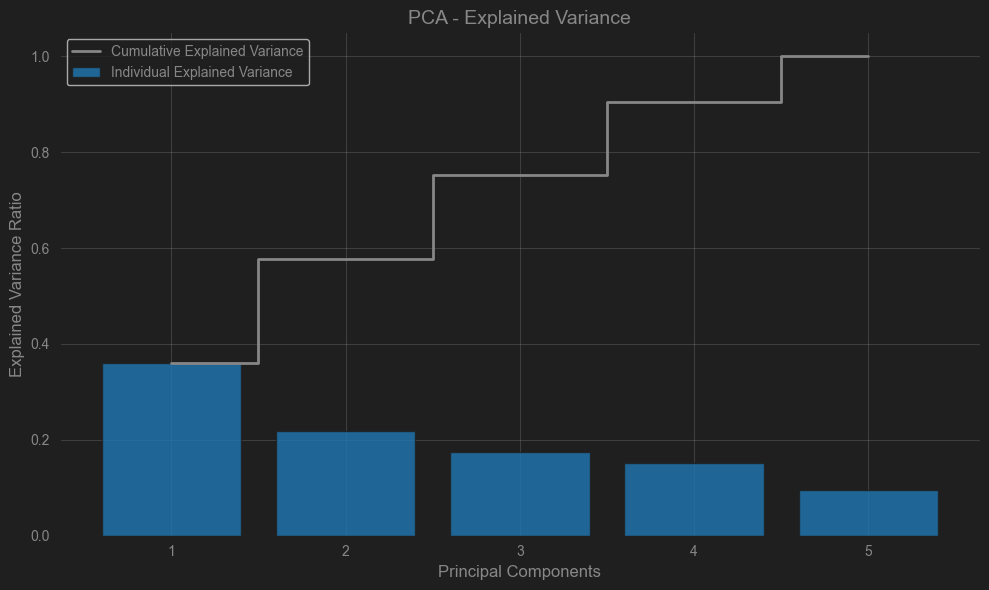

In [84]:
plt.figure(figsize=(10, 6))

# Individual variance
plt.bar(
    range(1, len(explained_var_ratio) + 1),
    explained_var_ratio,
    alpha=0.8,
    color=PRIMARY_COLOR,
    edgecolor=EDGE_COLOR,
    label="Individual Explained Variance"
)

# Cumulative variance
plt.step(
    range(1, len(cumulative_var_ratio) + 1),
    cumulative_var_ratio,
    where='mid',
    color=GRID_TEXT_COLOR,
    linewidth=2,
    label="Cumulative Explained Variance"
)

plt.xlabel("Principal Components", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.title("PCA - Explained Variance", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### **Step 4: Scatter Plot (First 2 PCs)**

For visualization in 2D:

In [85]:
fig = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    title="PCA - First Two Components",
    color_discrete_sequence=[PRIMARY_COLOR]
)

# Styling
fig.update_layout(
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    font=dict(color=GRID_TEXT_COLOR, size=12),
    title=dict(x=0.5, xanchor='center'),
)
fig.update_traces(marker=dict(size=8, line=dict(width=1, color=EDGE_COLOR)))
fig.update_xaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=GRID_TEXT_COLOR)
fig.update_yaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=GRID_TEXT_COLOR)

fig.show()
